In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [86]:
def sobelx(img):
    blur_img = cv2.GaussianBlur(img, (3, 3), 0) # apply gaussian blur
    filter = cv2.filter2D(blur_img, cv2.CV_32F, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])) # apply sobel filter for x
    sobel_img = cv2.convertScaleAbs(filter) # convert every value to absolute value of itself

    plt.imshow(img, 'gray')
    return sobel_img


def sobely(img):
    blur_img = cv2.GaussianBlur(img, (3, 3), 0) # apply gaussian blur
    filter = cv2.filter2D(blur_img, cv2.CV_32F, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])) # apply sobel filter for x
    sobel_img = cv2.convertScaleAbs(filter) # convert every value to absolute value of itself

    plt.imshow(img, 'gray')
    return sobel_img


def canny_edge(img):
    filtered_img = cv2.Canny(img, 0, 100)

    plt.imshow(img, 'gray')
    return filtered_img

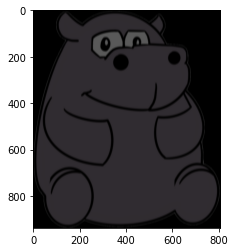

In [106]:
def gaussian(sigma, x):
    fract_part = (1/math.sqrt(2*math.pi*sigma**2))
    exp_part = math.e**(-(x**2)/(2*sigma**2))
    combined = fract_part * exp_part

    return  combined 


def gaussian_blur(img, sigma, x):
    """
    NOTE: Varying the value of sigma not only affects the brightness of the image, but also the blurriness. The lower sigma is, the less blurry an image is. Conversely, the higher sigma is, the blurrier and darker the image is.
    """
    kernel = np.array(gaussian(sigma, 0))
    for i in range(1, x):
        kernel = np.vstack((kernel, gaussian(sigma, i)))

    filter = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    plt.imshow(filter)
    return filter

def sharpen(image): # it seems that the standard shapening techniques have minimal effects on the blurred images
    kernel = np.array([[-1, -1, -1], 
                       [-1, 9.5, -1], 
                       [-1, -1, -1]])
    sharpened_img = cv2.filter2D(image, -1, kernel) # change the pixel intensity value of an image based on the surrounding pixel intensity values

    return sharpened_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(8271, 0)

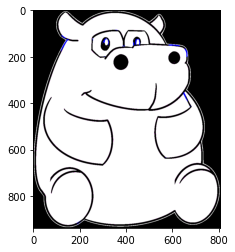

In [160]:
# TO-DO - FIX SCALE FUNCTION TO HOLD ONLY VALUES BETWEEN 0 AND 1
def scale(img, factor=1):
    factor = factor

    rows, cols, _ = img.shape

    newW = int(cols*factor)
    newH = int(rows*factor)

    newImage = np.zeros((newH, newW, img.shape[2]))
    for row in range(newH):
        for col in range(newW):
            p = img[int(row/factor), int(col/factor)]
            for layer in range(newImage.shape[2]):
                newImage[row][col][layer] = p[layer]
    # newImage = newImage/np.argmax(newImage)

    plt.imshow(newImage)

    return newImage
r = scale(bozu_img)
np.argmax(r), np.argmin(r)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Floating point image RGB values must be in the 0..1 range.

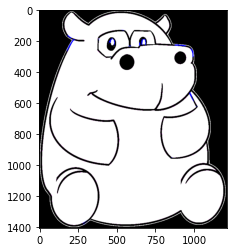

In [156]:
bozu_img = cv2.imread('Bozu.png')

choice = input(
    "Enter 1 to view sobel Bozu\n2 to get a gaussian blurred and sharpened-sih bozu\n3 to scale up bozu\nor 4 to exit\nYour choice: ")

while choice != '4':
    if choice == '1':
        result = sobelx(bozu_img) # this would give the same result if you did sobely(img) or canny_edge(img)
        plt.imsave('sobel_bozu.png', result)
    elif choice == '2':
        pre_result = gaussian_blur(img, 10, 10)
        result = sharpen(pre_result)
        plt.imsave('Sharpened_Bozu.png', result)
    elif choice == '3':
        size = float(input('How much do you want scale the image?'))
        result = scale(bozu_img, size)
        plt.imsave('scaled_bozu.png', result)
    else:
        print('Please enter a valid option.\n')

    choice = input(
        "Enter 1 to view sobel Bozu\n2 to get a gaussian blurred and sharpened-sih bozu\n3 to scale up bozu\nor 4 to exit\nYour choice: ")


print("Thank you for using our program!")
